DAMI course 2024
Assignment: Basic neural network with Digits dataset

For this assignment, you are expected to create a basic neural network using the Digits dataset. The goal is to demonstrate and analyze the performance of this network. 

In the assignment, you should write your code where the [your code here] placeholder is present.

In [3]:
# import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the digits dataset
digits_data = load_digits()
X, y = digits_data.data, digits_data.target

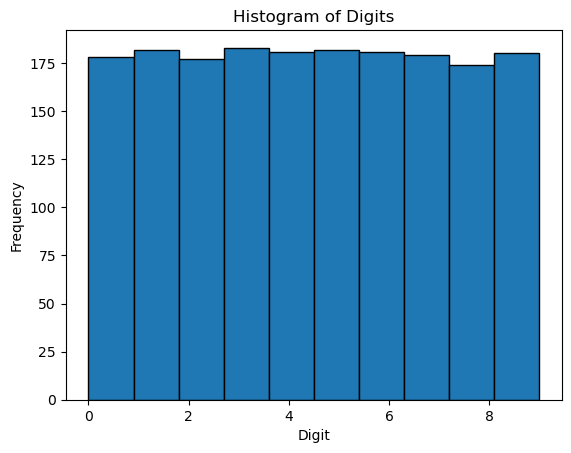

In [5]:
# Show a historam of dataset
plt.hist(y, bins=10, edgecolor='black')
plt.title('Histogram of Digits')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()

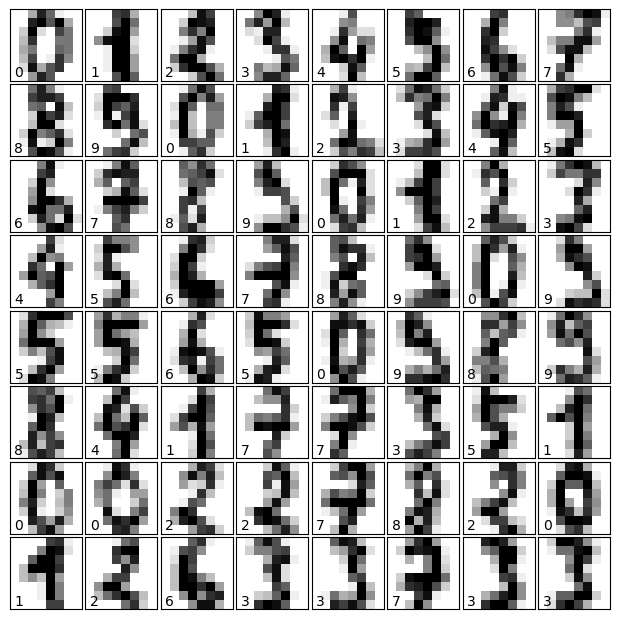

In [6]:
# Plot first 64 instances
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits_data.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits_data.target[i]))

In [8]:
# Split the data into train and temporary sets (80:20)

# [your code here]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print(" ")
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1437, 64)
Shape of X_test: (360, 64)
 
Shape of y_train: (1437,)
Shape of y_test: (360,)


In [9]:
# Split the temporary set into validation and test sets (50:50)

# [your code here]
X_temp, X_test, y_temp, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print("Shape of X_temp:", X_temp.shape)
print("Shape of X_test:", X_test.shape)
print(" ")
print("Shape of y_temp:", y_temp.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_temp: (180, 64)
Shape of X_test: (180, 64)
 
Shape of y_temp: (180,)
Shape of y_test: (180,)


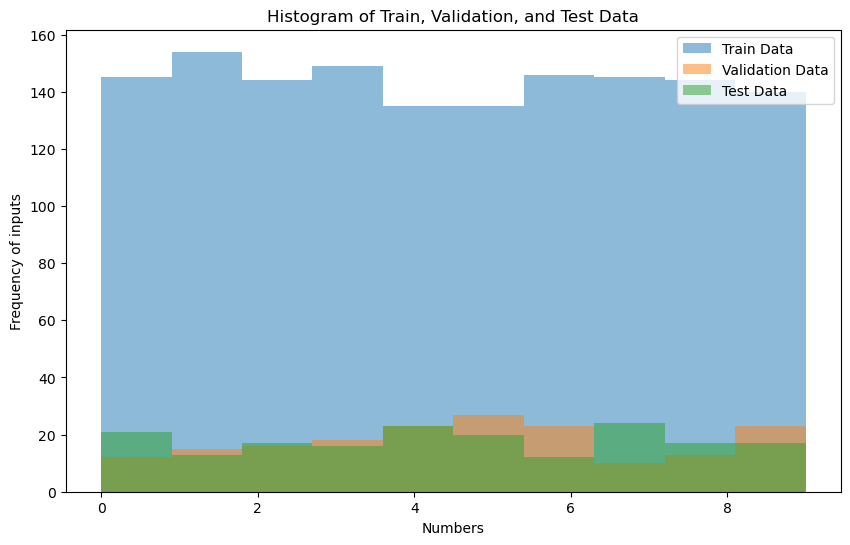

In [12]:
# Show a histogram of train, validation and test data

# [your code here]
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=len(set(y_train)), alpha=0.5, label='Train Data')
plt.hist(y_temp, bins=len(set(y_temp)), alpha=0.5, label='Validation Data')
plt.hist(y_test, bins=len(set(y_test)), alpha=0.5, label='Test Data')

# Add labels and title
plt.xlabel('Numbers')
plt.ylabel('Frequency of inputs')
plt.title('Histogram of Train, Validation, and Test Data')
plt.legend()

# Show the plot
plt.show()

In [14]:
# One-hot encode the labels
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the training labels (y_train)
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

# Transform the validation and test labels (y_temp, y_test)
y_temp_one_hot = encoder.transform(y_temp.reshape(-1, 1)).toarray()
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1)).toarray()

print("Shape of y_train_one_hot:", y_train_one_hot.shape)
print("Shape of y_temp_one_hot:", y_temp_one_hot.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)

# there are 10 classes  so each label is represented by a binary vector of length 10, to use for the model hypothetically

Shape of y_train_one_hot: (1437, 10)
Shape of y_temp_one_hot: (180, 10)
Shape of y_test_one_hot: (180, 10)


In [23]:
# Define a simple neural network
# need to install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the number of classes
num_classes = 10  # ten digits

# Initialize the Sequential model
model = Sequential()

# Add a Flatten layer to flatten the input, since input data is multidimensional format
model.add(Flatten(input_shape=(X_train.shape[1],)))  # Use X_train.shape[1] as input shape

# Add dense layers, hidden
model.add(Dense(128, activation='relu'))  # Hidden layer with 128 neurons and ReLU activation
model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation for multiclass classification




In [24]:
# Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Since your labels are integers, not one-hot encoded
              metrics=['accuracy'])

# Print the summary of the model
model.summary()
#  Flatten layer, it transforms the input shape of (8, 8) into a one-dimensional array with a shape of (64,), as 8x8 equals 64. (INPUT)
#  The Dense layers transform the input according to the specified number of neurons in each layer. (None indicates that the batch size can be of any size), 128 neurons
#  last layer represents the output with 10 neurons for each digit (each class)
#  Param #: This column shows the number of parameters (weights and biases) in each layer



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,610 (37.54 KB)

 Trainable params: 9,610 (37.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Train the model with validation data

history = model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_temp, y_temp_one_hot))



Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2616 - loss: 5.0823 - val_accuracy: 0.7222 - val_loss: 0.8687
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8332 - loss: 0.5232 - val_accuracy: 0.8833 - val_loss: 0.3990
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9182 - loss: 0.2427 - val_accuracy: 0.9000 - val_loss: 0.2678
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9440 - loss: 0.1690 - val_accuracy: 0.9056 - val_loss: 0.2439
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9757 - loss: 0.1099 - val_accuracy: 0.9389 - val_loss: 0.1950
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9789 - loss: 0.0952 - val_accuracy: 0.9333 - val_loss: 0.2032
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9878 - loss: 0.0627 - val_accuracy: 0.9389 - val_loss: 0.1648
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9932 - loss: 0.0517 - val_accuracy: 0.9333 - val_loss:

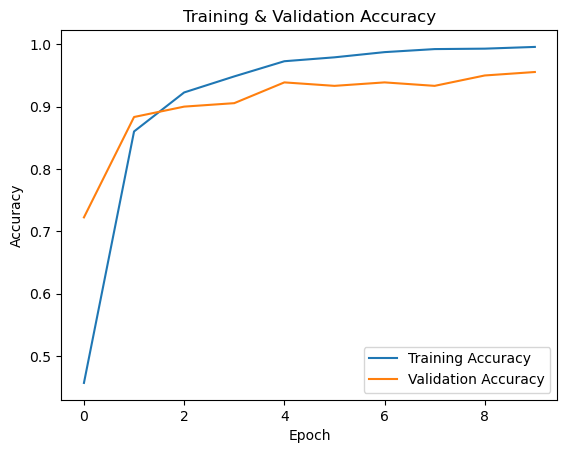

In [26]:
# Plot training & validation accuracy values

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training & validation accuracy values
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9780 - loss: 0.0500 
Test Accuracy: 0.9777777791023254
Test Loss: 0.05169462040066719


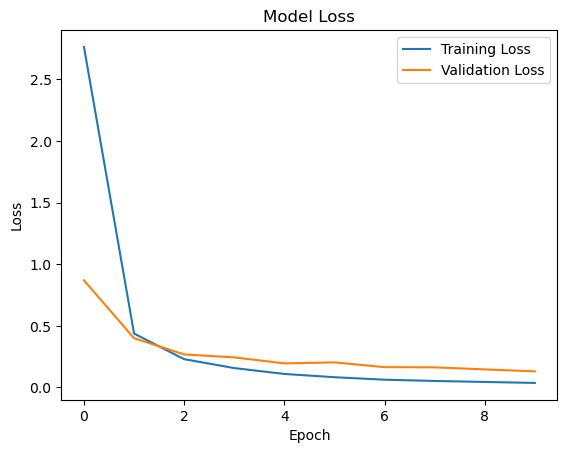

In [33]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [31]:
# Get the model's predictions
predictions_one_hot = model.predict(X_test)

# Convert the predictions from categorical to class labels
predictions = np.argmax(predictions_one_hot, axis=1)

# Convert the test labels from categorical to class labels
true_labels = np.argmax(y_test_one_hot, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)




6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step


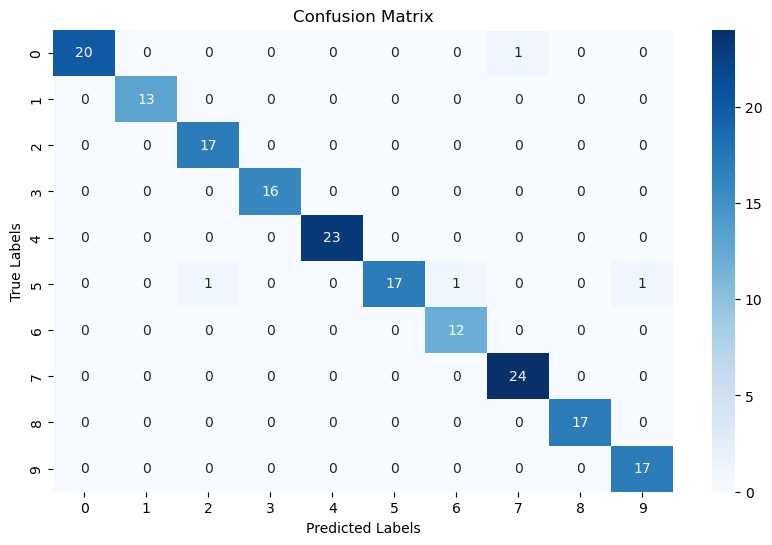

In [32]:
# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# The model seems to workk well, judging by the confusion matrix, only 4 digits werent classified correctly in total, which is pretty good
